In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install fastai==1.0.52
from fastai.text import *

     |████████████████████████████████| 225kB 6.1MB/s 
     |████████████████████████████████| 81kB 7.7MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-cp36-none-any.whl size=26307 sha256=b0369a726e5277a9288e0ae1fa6864414b29a265419d263b1eb7d8a4c56536fc
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
Successfully built typing
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [3]:
# don't need for run
import os # set the all path where store the datasets
path = Path(os.getcwd())
path = path/'gdrive'/'My Drive'
# news=path/'Thesis Data'/'full doc csv'
aa=path/'Thesis Data'/'Our dataset'
# aa=path/'Thesis Data'/'Our dataset'
# aa2=path/'Thesis Data'/'AA dataset'
# char=path/'Thesis Data'/'char-ulm'

In [ ]:
# aa = '/content/drive/My Drive/Colab Notebooks'



In [4]:
bs = 32
bptt = 70
vocab = " !\"#$%&'()*+,-./0123456789:;=<>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]^_`abcdefghijklmnopqrstuvwxyz{|}~¥§©±ঃঅআইঈউঊঋএঐওঔকখগঘঙচছজঝঞটঠডঢণতথদধনপফবভমযরলশষসহ়ািীুূৃেৈোৌ্ৎৗড়ঢ়য়০১২৩৪৫৬৭৮৯৷‘’‚“”‪™−√∝∞"  # set all things in vocab 

In [6]:
class NewTokenizer(BaseTokenizer):
    def tokenizer(self,t):
      return [BOS]+[i for i in t]

In [7]:
itos = [UNK, PAD, BOS, EOS, FLD, TK_REP, TK_WREP] + [i for i in vocab]

In [8]:
len(itos)

188

In [9]:
vocab=Vocab(itos)
tokenizer=Tokenizer(NewTokenizer, pre_rules=[], post_rules=[]) # create a instance of 'NewTokenizer' class

In [10]:
# here applying 'ourDataset_train' using LM
data_lm_AA = TextLMDataBunch.from_csv(aa , 'OurDataset_train.csv', vocab=vocab, bs=bs, tokenizer=tokenizer) # read the csv data using vocabulary and batch size also with tokenizer,
data_lm_AA.save('train_AA_char_lm.pkl') # this data save into this .pkl file

In [11]:
data_lm_AA = load_data(aa, 'train_AA_char_lm.pkl',bs=bs) # load the data from .pkl file with batch size =32

In [12]:
data_lm_AA.show_batch()

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:337: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx_min = (t != self.pad_idx).nonzero().min()


idx,text
0,"ব ল ল ে , “ স ে জ ো ব উ ক ি ন ্ ত ু ব া xxunk চ ব ে ন া ছ ো ট ো - ম ি য় ে xxunk ! ” ব ল ে ই দ ী র ্ ঘ শ ্ ব া স"
1,ে ল া গ ল ে ন xxunk শ ে ষ প র ্ য ন ্ ত আ র া ক া ন ে র ম গ স ৈ ন ্ য র া য খ ন এ স ে প ড় ল র া জ ধ া ন ী
2,xxunk ব ি শ ্ ব া স অ র ্ জ ন ে র জ ন ্ য ে স ব স ম য় ে ই প ী র দ ে র স ম ্ প র ্ ক ে অ ল ৌ ক ি ক ক া হ ি ন ী
3,ল া য় ক থ া ব ল ছ ে xxunk ট ি ভ ি ক ে ছ ে ড ় ে ছ ে ? ব ি ড় া ল ট া ন ি শ ্ চ য় ই ন া xxunk জ া ম া ল ে র ক
4,া র ত া ক ে এ ক ট ু দ ে খ ো xxunk এ খ া ন ে থ া ক ত ে য দ ি ন া চ া য় আ ম া র ন া ম ক র ে ত া ক


In [13]:
# apply fast ai in pytorch,pretrained will use fastai's pretrained model for this arch or you can pretrained_fnames containing your own pretrained model and the corresponding vocabulary
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5) # apply language_model_learner(define a learner using pretrained model) in 'data_lm_AA' dataset with AWD_LSTM(model toolkit for pytorch) where pretrained is false and drop rate is 0.5

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


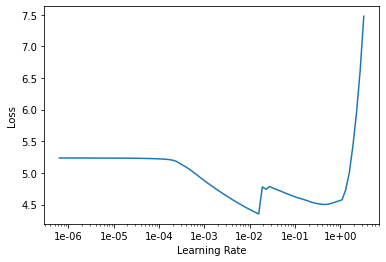

In [14]:
learn.lr_find(); # keras learning rate finder method
learn.recorder.plot(); # plot the learning rate where we can see that firstly loss decreases after the loss increased suddenly
plt.savefig('clr_char.eps')  # the figure save in 'clr_char.eps' file

In [15]:
learn.freeze() # freeze() is passed an immutable object,as determined by hash() on that object not raising TypeError,then the object is returned directly
learn.fit_one_cycle(2, 1e-2) # 'fit_one_cycle' use for directly strar training,by the parameter shows just 2 epochs of train loss,valid loss, accuracy and time'
learn.save('AA_char_lm_head'); # this 2 epcoh's train_loss,valid_loss,accuracy and time save onto 'AA_char_lm_head' file

epoch,train_loss,valid_loss,accuracy,time
0,3.438446,3.362775,0.168003,37:57
1,3.375198,3.346339,0.170933,38:13


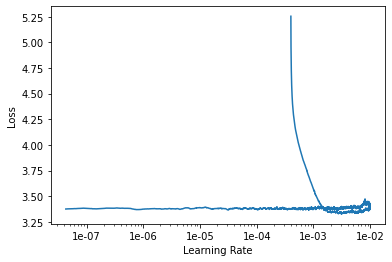

In [17]:
learn.recorder.plot(skip_end=10); # here plotting without last portion
plt.savefig('clr_char_skipend.eps') # the file save onto this file

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


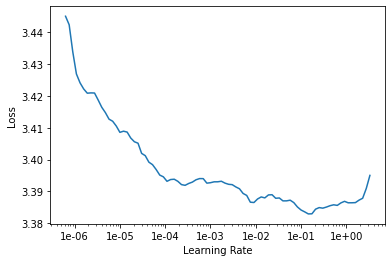

In [18]:
learn.lr_find(); # call the keras learning rate finder method
learn.recorder.plot(); # now plot this dataset 
plt.savefig('clr_char_lmAA.eps') # this figure save onto a file

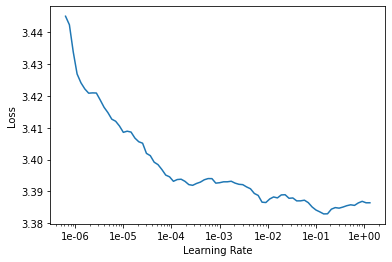

In [19]:
learn.recorder.plot(skip_end=10); # skip the last term of previous figure and plot it
plt.savefig('clr_char_lmAA_skipend.eps') # now save it onto a .eps file

In [23]:
learn.load('AA_char_lm_head'); # load the previous save data
# unfreeze means model weights are not frozen so we can train this model,we need to unfreeze the learner before we can retrain it
learn.unfreeze() # default is freeze,so you have to set the last layer should be unfrozen only in pretrained model,all of the layers are trainable,all weights from frozen layers of the model now can get updated from their pre-trained state according to loss function
learn.fit_one_cycle(1, 1e-2) # training model on first epoch,2nd parameter maintains low learning rate for initial layers
learn.save_encoder('AA_char_lm_enc') # save the file in model directory(the model directory is: Learner.path/Learner.model_dir)

epoch,train_loss,valid_loss,accuracy,time
0,3.337064,3.335950,0.170990,39:26


In [24]:
# here applying 'ourDataset_train' without using LM
data_clas = TextClasDataBunch.from_csv(aa , 'OurDataset_train.csv',  vocab=vocab, bs=bs, tokenizer=tokenizer) # read the csv file using TextClassDataBunch with vocabulary,batch size and tokenizer
data_clas.save('AA_char_clas.pkl') # save file on this 

In [25]:
data_clas = load_data(aa, 'AA_char_clas.pkl',bs=bs) # load the data using batch size = 32
# create a learner with a text classifier from dls and arch,you can use the config to customize the architecture used pretrained will use fastai's pretrained model for this arch(awd_lstm_class_config)
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False) # drop_mult is a global multiplier applied to control all dropouts
learn_cls.load_encoder('AA_char_lm_enc') # the model uses a senetenceEncoder,which means the texts are passed seq_len tokens at a time,and will compute the gradients on the last max_len steps

In [26]:
data_clas.show_batch()

text,target
"xxbos x x b o s এ ক ন া প ি ত া ন ী আ স ি ল xxunk ন া প ি ত া ন ী স ধ ব া , খ া ট ো র া ঙ ্ গ া প ে ড় ে স া ড় ী প র",bongkim
"xxbos x x b o s গ ৃ হ ম ধ ্ য স ্ থ এ ক ব ্ য ক ্ ত ি ব া হ ি র ে আ স ি ল ে ন , এ ব xxunk আ স ি য় া ই ক প া ল ক ু ণ",bongkim
"xxbos x x b o s ক র ি ল ে ন xxunk ক থ ি ত ব া ল ু ক া স ্ ত ূ প শ ্ র ে ণ ী প ্ র স ্ থ ে অ ত ি অ ল ্ প , অ ত এ ব ন",bongkim
xxbos x x b o s প া র ি ল া ম ন া xxunk এ স ক ল এ ই অ ঙ ্ গ ে র ই উ প য ু ক ্ ত xxunk এ ই জ ন ্ য প র া ই ল,bongkim
"xxbos x x b o s ত া হ া ক ে দ ু ই ব া হ ু ত ে জ ড় া ই য় া ধ র ি ল xxunk অ শ ্ ব া র ো হ ী র ব য় স অ ধ ি ক ন য় ,",shordindu


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


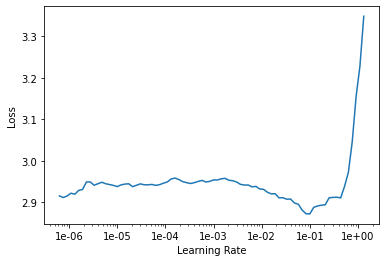

In [27]:
learn_cls.freeze() # freezing prevents the weights of a neural network layer from being modified during backward pass of training,you progressively 'lock-in' the weigts of each layer to reduce the amount of computation in the backward pass and decrease training time,you can unfreeze a model if you decide you want to continue training
# an example of this is transfer learnig:start with a pre-trained model,unfreeze the weights,then continuing training on a different dataset.when you choose to freeze is a balance between freezing early enough to gain computational speed-up without freezing too early with weights that result in inaccurate predictions
learn_cls.lr_find() # here call the learning rate finder method
learn_cls.recorder.plot() # for plotting loss against learning rate

In [28]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7)) # train using 2 epochs,2n parameter maintains low learning rate for initial layers
learn_cls.save('char_cls_1') # save it onto this file

epoch,train_loss,valid_loss,accuracy,time
0,2.533279,2.609792,0.257043,19:37
1,2.469122,2.521401,0.257391,19:21
